# Autoencoder-NMF Based Bleeding Removal 

### Initial - Old

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, \
    MaxPool2D, BatchNormalization, MaxPooling2D, \
    Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [3]:
import numpy as np

In [4]:
import keras
from keras import layers

In [5]:
xtrain = [[[ 1,  0,  9],
       [ 1, 24, 16],
       [ 1,  7,  1]], [[ 1,  0,  1],
       [ 1,  1, 16],
       [ 1,  7,  1]], [[1, 0, 1],
       [1, 0, 0],
       [0, 0, 1]]]

W = [[[1, 2, 3],[1, 2, 4], [1, 1, 1]],
         [[1, 2, 1],[1, 1, 4], [1, 1, 1]],
         [[1, 2, 1],[1, 1, 0], [0, 1, 1]]]

H = [[[1, 0, 3],[1, 12, 4], [1, 7, 1]],
         [[1, 0, 1],[1, 1, 4], [1, 7, 1]],
         [[1, 0, 1],[1, 0, 4], [1, 0, 1]]]

xtrain = np.array(xtrain)
W = np.array(W)
H = np.array(H)

xtrain.shape, W.shape, H.shape

((3, 3, 3), (3, 3, 3), (3, 3, 3))

In [6]:
def flattens(x):
    res = []
    for i in x:
        res.append(i.flatten())
    return np.array(res)

In [7]:
xtrain = flattens(xtrain)
W = flattens(W)
H = flattens(H)

In [9]:
encoding_dim = 32 

input_img = keras.Input(shape=(9,))

encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(9, activation='sigmoid')(encoded)


autoencoder = keras.Model(input_img, decoded)

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
autoencoder.fit(xtrain, H,
                epochs=10,
                batch_size=16,
                shuffle=True)

Epoch 1/10
1/1 [==============================] - 1s 690ms/step - loss: 7.8608
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 7.5767
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 7.2947
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 7.0148
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 6.7370
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 6.4614
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 6.1879
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 5.9167
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 5.6476
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 5.3806


### Paris Smaragdis's Paper Recreation

In [59]:
import librosa as lb
from matplotlib import pyplot as plt
import numpy as np
import os
from librosa import display

In [63]:
from sklearn.decomposition import NMF

In [54]:
audio, fs = lb.load('/home/rajesh/Desktop/pianonotes.wav')
audio, fs

(array([6.4943055e-07, 1.1331637e-05, 5.1647457e-05, ..., 1.5321817e-05,
        1.5143011e-05, 1.5781023e-05], dtype=float32),
 22050)

In [55]:
stft_audio = lb.stft(audio)

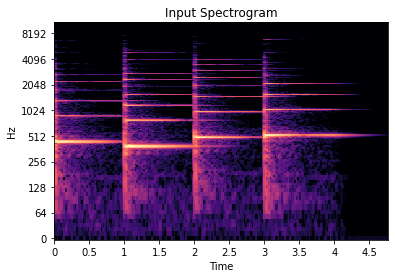

In [107]:
lb.display.specshow(lb.amplitude_to_db(np.abs(stft_audio), ref=np.max),
                               y_axis='log', x_axis='time')
plt.title('Input Spectrogram')
plt.show()

In [64]:
model = NMF(n_components=4, init='random', random_state=0)
W = model.fit_transform(np.abs(stft_audio))
H = model.components_

In [68]:
W.shape, H.shape

((1025, 4), (4, 206))

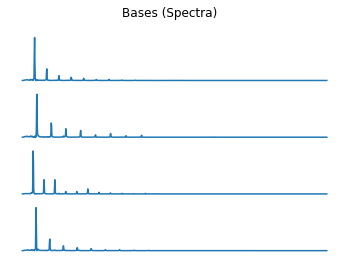

In [105]:
plt.subplots()
plt.subplot(4, 1, 1)
plt.plot(W.T[0])
plt.axis('off')
plt.subplot(4, 1, 2)
plt.plot(W.T[1])
plt.axis('off')
plt.subplot(4, 1, 3)
plt.plot(W.T[2])
plt.axis('off')
plt.subplot(4, 1, 4)
plt.plot(W.T[3])
plt.axis('off')
plt.suptitle('Bases (Spectra)')
plt.show()

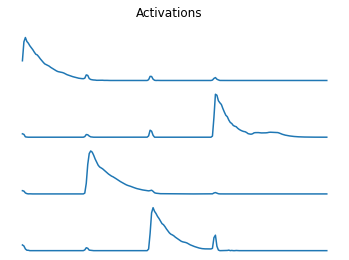

In [94]:
plt.subplots()
plt.subplot(4, 1, 1)
plt.plot(H[0])
plt.axis('off')
plt.subplot(4, 1, 2)
plt.plot(H[1])
plt.axis('off')
plt.subplot(4, 1, 3)
plt.plot(H[2])
plt.axis('off')
plt.subplot(4, 1, 4)
plt.plot(H[3])
plt.axis('off')
plt.suptitle('Activations')
plt.show()

### Temp Sample Random Dataset Creation

In [147]:
train = []

for i in range(70):
    r = np.random.randint(100, 200)
    train.append(np.random.rand(3,r))
    
xtrain = train[:50]
xtest = train[50:]

len(xtrain), len(xtest)

(50, 20)

In [148]:
xtrain = tf.ragged.constant(xtrain)
xtest = tf.ragged.constant(xtest)

In [149]:
ytrain = xtrain
ytest = xtest

### NMF CAE Model

In [150]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [161]:
batch_size = 16
epochs = 2
inp = Input(shape =(3, None, 1))
out_dim = inp

In [162]:
print('Input:', inp.shape)

H = Conv2D(1, 3, activation='relu', kernel_regularizer='l1')(inp)
H = BatchNormalization()(H)

print('Layer 1:', H.shape)

X_ = Conv2DTranspose(1, 3, activation='relu')(H)
X_ = BatchNormalization()(X_)

print('Layer 2:', X_.shape)

Input: (None, 3, None, 1)
Layer 1: (None, 1, None, 1)
Layer 2: (None, 3, None, 1)


In [163]:
class JointLoss(tf.keras.losses.Loss):
    
    def __init__(self):
        super().__init__()
        
    def call(self, y_true, y_pred):
        
        D = y_true * log(y_true / y_pred) - y_true + y_pred
        
        return D
        #mse = tf.reduce_mean(tf.square(y_pred-y_true))
        #rmse = tf.math.sqrt(mse)
        #return rmse / tf.reduce_mean(tf.square(y_true)) - 1

In [164]:
NAE = Model(inp, X_)
#NAE.compile(optimizer='adam', loss='mse')
NAE.compile(optimizer=Adam(learning_rate=0.001), loss=JointLoss())

In [ ]:
autoencoder.fit(xtrain, ytrain,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

### NMF Reccurent Model

In [178]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed
from keras.utils import to_categorical
import numpy as np

In [179]:
model = Sequential()

model.add(LSTM(32, return_sequences=True, input_shape=(None, 5)))
model.add(LSTM(8, return_sequences=True))
model.add(TimeDistributed(Dense(2, activation='sigmoid')))

In [180]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(xtrain, ytrain,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True)

In [181]:
def train_generator():
    while True:
        sequence_length = np.random.randint(10, 100)
        x_train = np.random.random((1000, sequence_length, 5))
        # y_train will depend on past 5 timesteps of x
        y_train = x_train[:, :, 0]
        for i in range(1, 5):
            y_train[:, i:] += x_train[:, :-i, i]
        y_train = to_categorical(y_train > 2.5)
        yield x_train, y_train

In [182]:
model.fit_generator(train_generator(), steps_per_epoch=30, epochs=10, verbose=1)

Epoch 1/10


/tmp/ipykernel_642070/1145235773.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator(), steps_per_epoch=30, epochs=10, verbose=1)


30/30 [==============================] - 5s 86ms/step - loss: 0.6900
Epoch 2/10
30/30 [==============================] - 3s 98ms/step - loss: 0.6791
Epoch 3/10
30/30 [==============================] - 3s 92ms/step - loss: 0.6464
Epoch 4/10
30/30 [==============================] - 3s 101ms/step - loss: 0.5713
Epoch 5/10
30/30 [==============================] - 3s 90ms/step - loss: 0.4706
Epoch 6/10
30/30 [==============================] - 3s 95ms/step - loss: 0.3821
Epoch 7/10
30/30 [==============================] - 3s 99ms/step - loss: 0.3117
Epoch 8/10
30/30 [==============================] - 3s 103ms/step - loss: 0.2579
Epoch 9/10
30/30 [==============================] - 3s 91ms/step - loss: 0.2164
Epoch 10/10
30/30 [==============================] - 3s 110ms/step - loss: 0.1872
